In [47]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

In [48]:
#iris

In [56]:
X = np.append(iris.data[0: 40],iris.data[50: 50 + 40])
X = np.append(X, iris.data[100: 100 + 40])
y = np.append(iris.target[0:40],iris.target[50:50 + 40])
y = np.append(y, iris.target[100: 100 + 40])
X = X.reshape(120,4)

In [57]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [60]:
def get_winner(class1):
    
    numbers = [*range(11)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 462
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 100)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-iris2")
    [stats, winner] = run(config_path)
    
    return winner

In [61]:
winner_list = []
classes = [[2],[1]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:40
number of class2:80

 ****** Running generation 0 ****** 

Population's average fitness: 0.51113 stdev: 0.16693
Best fitness: 0.67500 - size: (2, 1) - species 2 - id 6
Average adjusted fitness: 0.452
Mean genetic distance 2.307, standard deviation 0.466
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 0.204 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55257 stdev: 0.16140
Best fitness: 0.82500 - size: (3, 3) - species 7 - id 273
Average adjusted fitness: 0.434
Mean genetic distance 2.267, standard deviation 0.422
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 0.231 sec (0.217 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58654 stdev: 0.14949
Best fitness: 0.87500 - size: (4, 5) - species 7 - id 563
Average adjusted fitness: 0.461
Mean genetic distance 2.308, standard deviation 0.451
Population of 200 members in 9 species
Total extinctions: 0
Gene

Population of 190 members in 26 species
Total extinctions: 0
Generation time: 0.429 sec (0.532 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65500 stdev: 0.17620
Best fitness: 0.95000 - size: (6, 10) - species 39 - id 1168
Average adjusted fitness: 0.400
Mean genetic distance 3.047, standard deviation 0.559
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.471 sec (0.513 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65415 stdev: 0.19092
Best fitness: 0.95000 - size: (6, 8) - species 29 - id 4040
Average adjusted fitness: 0.507
Mean genetic distance 3.046, standard deviation 0.587
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 0.570 sec (0.511 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62602 stdev: 0.19574
Best fitness: 0.95000 - size: (6, 8) - species 29 - id 4040
Average adjusted fitness: 0.564
Mean genetic distance 3.

Population of 203 members in 20 species
Total extinctions: 0
Generation time: 0.535 sec (0.493 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65920 stdev: 0.16059
Best fitness: 0.95833 - size: (6, 9) - species 48 - id 6888
Average adjusted fitness: 0.285
Mean genetic distance 3.004, standard deviation 0.529
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 0.599 sec (0.510 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.65090 stdev: 0.17223
Best fitness: 0.95833 - size: (6, 9) - species 48 - id 6888
Average adjusted fitness: 0.286
Mean genetic distance 3.008, standard deviation 0.530
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 0.498 sec (0.512 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64491 stdev: 0.16535
Best fitness: 0.95833 - size: (6, 9) - species 48 - id 6888
Average adjusted fitness: 0.332
Mean genetic distance 3.0

Population of 197 members in 15 species
Total extinctions: 0
Generation time: 0.533 sec (0.537 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.65935 stdev: 0.18168
Best fitness: 0.95833 - size: (6, 8) - species 73 - id 7832
Average adjusted fitness: 0.351
Mean genetic distance 3.041, standard deviation 0.580
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 0.623 sec (0.551 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.65271 stdev: 0.17690
Best fitness: 0.95833 - size: (6, 8) - species 73 - id 7832
Average adjusted fitness: 0.387
Mean genetic distance 3.013, standard deviation 0.591
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 0.583 sec (0.557 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.67835 stdev: 0.16788
Best fitness: 0.95833 - size: (8, 10) - species 69 - id 12200
Average adjusted fitness: 0.334
Mean genetic distance 3


Population's average fitness: 0.66071 stdev: 0.18308
Best fitness: 0.96667 - size: (7, 14) - species 76 - id 13944
Average adjusted fitness: 0.338
Mean genetic distance 3.137, standard deviation 0.588
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 0.587 sec (0.603 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.67588 stdev: 0.15906
Best fitness: 0.96667 - size: (7, 14) - species 76 - id 13944
Average adjusted fitness: 0.370
Mean genetic distance 3.154, standard deviation 0.562
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 0.605 sec (0.606 average)
number of class1:40
number of class2:80

 ****** Running generation 0 ****** 

Population's average fitness: 0.47346 stdev: 0.15723
Best fitness: 0.66667 - size: (2, 1) - species 1 - id 5
Average adjusted fitness: 0.163
Mean genetic distance 2.317, standard deviation 0.479
Population of 199 members in 11 species
Total extinctions: 0
Generation tim

Total extinctions: 0
Generation time: 0.447 sec (0.399 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59941 stdev: 0.13941
Best fitness: 0.76667 - size: (6, 10) - species 14 - id 4064
Average adjusted fitness: 0.270
Mean genetic distance 3.035, standard deviation 0.557
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.427 sec (0.409 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.59832 stdev: 0.13829
Best fitness: 0.76667 - size: (6, 10) - species 14 - id 4064
Average adjusted fitness: 0.260
Mean genetic distance 3.113, standard deviation 0.566
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.454 sec (0.418 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61921 stdev: 0.12422
Best fitness: 0.78333 - size: (9, 15) - species 18 - id 5618
Average adjusted fitness: 0.291
Mean genetic distance 3.104, standard deviation 0.571
Populati

Population of 195 members in 16 species
Total extinctions: 0
Generation time: 0.515 sec (0.520 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.61214 stdev: 0.12979
Best fitness: 0.79167 - size: (6, 7) - species 30 - id 8722
Average adjusted fitness: 0.313
Mean genetic distance 3.162, standard deviation 0.572
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 0.511 sec (0.513 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.60987 stdev: 0.13494
Best fitness: 0.83333 - size: (7, 10) - species 30 - id 9407
Average adjusted fitness: 0.276
Mean genetic distance 3.185, standard deviation 0.564
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.577 sec (0.520 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.61766 stdev: 0.12537
Best fitness: 0.83333 - size: (7, 10) - species 30 - id 9407
Average adjusted fitness: 0.290
Mean genetic distance 3

Population of 195 members in 17 species
Total extinctions: 0
Generation time: 0.713 sec (0.701 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.57590 stdev: 0.16216
Best fitness: 0.85000 - size: (11, 18) - species 56 - id 12131
Average adjusted fitness: 0.289
Mean genetic distance 3.179, standard deviation 0.577
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 0.674 sec (0.694 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.57273 stdev: 0.16387
Best fitness: 0.85000 - size: (11, 18) - species 56 - id 12131
Average adjusted fitness: 0.239
Mean genetic distance 3.180, standard deviation 0.575
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 0.680 sec (0.695 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.59810 stdev: 0.15218
Best fitness: 0.85000 - size: (11, 18) - species 56 - id 12131
Average adjusted fitness: 0.279
Mean genetic dis

In [62]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-iris2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [63]:
testX = np.append(iris.data[40: 50],iris.data[90: 100])
testX = np.append(testX, iris.data[140: 150])
testy = np.append(iris.target[40:50],iris.target[90:100])
testy = np.append(testy, iris.target[140: 150])
testX = testX.reshape(30,4)

In [66]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(3)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [67]:
number_codes = [[0, 0],
[0, 1],
[1, 0]]

In [95]:
pred_value = []
error_list = []

for j in range(30):
    pred = []
    for i in range(2):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(3):
        error.append(2 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [110]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/30

0.9333333333333333

In [111]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:0 index:[0] real:0
#1 min_error:0 index:[1] real:0
#2 min_error:0 index:[0] real:0
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[0] real:0
#5 min_error:0 index:[1] real:0
#6 min_error:0 index:[0] real:0
#7 min_error:0 index:[0] real:0
#8 min_error:0 index:[0] real:0
#9 min_error:0 index:[0] real:0
#10 min_error:0 index:[1] real:1
#11 min_error:0 index:[1] real:1
#12 min_error:0 index:[1] real:1
#13 min_error:0 index:[1] real:1
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[1] real:1
#16 min_error:0 index:[1] real:1
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[1] real:1
#19 min_error:0 index:[1] real:1
#20 min_error:0 index:[2] real:2
#21 min_error:0 index:[2] real:2
#22 min_error:0 index:[2] real:2
#23 min_error:0 index:[2] real:2
#24 min_error:0 index:[2] real:2
#25 min_error:0 index:[2] real:2
#26 min_error:0 index:[2] real:2
#27 min_error:0 index:[2] real:2
#28 min_error:0 index:[2] real:2
#29 min_error:0 index:[2] real:2


In [113]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[ 8  0  0]
 [ 2 10  0]
 [ 0  0 10]]


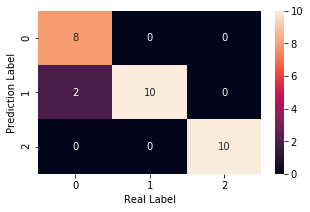

In [115]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()